# Image Processing With Neural Networks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## Images as data: visualizations

To display image data, you will rely on Python's Matplotlib library, and specifically use matplotlib's pyplot sub-module, that contains many plotting commands. Some of these commands allow you to display the content of images stored in arrays.

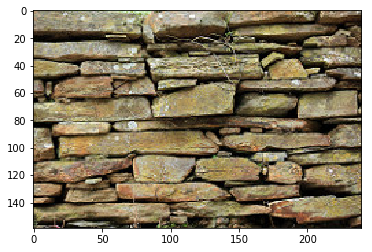

In [2]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread('bricks.png')

# Display the image
plt.imshow(data)
plt.show()

## Images as data: changing images

To modify an image, you can modiy the existing numbers in the array. In a color image, you can change the values in one of the color channels without affecting the other colors, by indexing on the last dimension of the array.

The image you imported in the previous exercise is available in data.

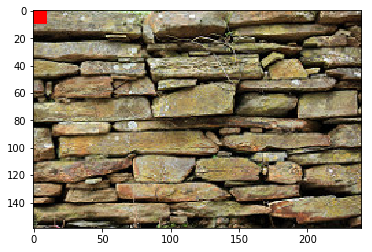

In [3]:
# Set the red channel in this part of the image to 1
data[:10, :10, 0] = 1

# Set the green channel in this part of the image to 0
data[:10, :10, 1] = 0

# Set the blue channel in this part of the image to 0
data[:10, :10, 2] = 0

# Visualize the result
plt.imshow(data)
plt.show()

## Using one-hot encoding to represent images

Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner: each row in the array contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.

The fashion dataset contains three categories:

    Shirts
    Dresses
    Shoes

In this exercise, you will create a one-hot encoding of a small sample of these labels.

In [5]:
labels = ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

In [6]:
# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

## Evaluating a classifier

To evaluate a classifier, we need to test it on images that were not used during training. This is called "cross-validation": a prediction of the class (e.g., t-shirt, dress or show) is made from each of the test images, and these predictions are compared with the true labels of these images.

The results of cross-validation are provided as one-hot encoded arrays: test_labels and predictions.

In [10]:
test_labels = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])
predictions = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [11]:
# Calculate the number of correct predictions
number_correct = (test_labels * predictions).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(proportion_correct)

6.0
0.75


## Build a neural network

We will use the Keras library to create neural networks and to train these neural networks to classify images. These models will all be of the Sequential type, meaning that the outputs of one layer are provided as inputs only to the next layer.

In this exercise, you will create a neural network with Dense layers, meaning that each unit in each layer is connected to all of the units in the previous layer. For example, each unit in the first layer is connected to all of the pixels in the input images. The Dense layer object receives as arguments the number of units in that layer, and the activation function for the units. For the first layer in the network, it also receives an input_shape keyword argument.

In [12]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

Using TensorFlow backend.


## Compile a neural network

Once you have constructed a model in Keras, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list ['accuracy'] to the metrics keyword argument.

In [13]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Fitting a neural network model to clothing data

In this exercise, you will fit the fully connected neural network that you constructed in the previous exercise to image data. The training data is provided as two variables: train_data that contains the pixel data for 50 images of the three clothing classes and train_labels, which contains one-hot encoded representations of the labels for each one of these 50 images. Transform the data into the network's expected input and then fit the model on training data and training labels.

The model you compiled in the previous exercise, and train_data and train_labels are available in your workspace.

In [17]:
train_data = np.loadtxt('54Data1.txt', delimiter=',').reshape(50, 28, 28, 1)
train_labels = np.array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [18]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape(50, 784)

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 3s 67ms/step - loss: 1.0908 - acc: 0.4500 - val_loss: 1.1371 - val_acc: 0.3000
Epoch 2/3
40/40 [==============================] - 0s 299us/step - loss: 1.0338 - acc: 0.5000 - val_loss: 1.0648 - val_acc: 0.3000
Epoch 3/3
40/40 [==============================] - 0s 374us/step - loss: 0.9745 - acc: 0.5500 - val_loss: 1.0135 - val_acc: 0.3000


## Cross-validation for neural network evaluation

To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

The model you fit in the previous exercise, and test_data and test_labels are available in your workspace.

In [22]:
test_data = np.loadtxt('54Data2.txt', delimiter=',').reshape(10, 28, 28, 1)
test_labels = np.array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [23]:
# Reshape test data
test_data = test_data.reshape(10, 784)

# Evaluate the model
model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 596us/step


[1.0148990154266357, 0.30000001192092896]

# Using Convolutions

## One dimensional convolutions

A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.

In [24]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


## Image convolutions

The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.

In [26]:
im = np.loadtxt('54Data3.txt', delimiter=',')

In [27]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[2.68104586 2.95947725 2.84313735 ... 0.         0.         0.        ]
 [3.01830077 3.07058835 3.05098051 ... 0.         0.         0.        ]
 [2.95163405 3.09934652 3.20261449 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Defining image convolution kernels

In the previous exercise, you wrote code that performs a convolution given an image and a kernel. This code is now stored in a function called convolution() that takes two inputs: image and kernel and produces the convolved image. In this exercise, you will be asked to define the kernel that finds a particular feature in the image.

For example, the following kernel finds a vertical line in images:

    np.array([[-1, 1, -1], 
              [-1, 1, -1], 
              [-1, 1, -1]])


Define a kernel that finds horizontal lines in images.

In [28]:
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1 ,-1]])

Define a kernel that finds a light spot surrounded by dark pixels.

In [29]:
kernel = np.array([[-1, -1, -1],
                   [-1, 1, -1],
                   [-1, -1, -1]])

## Convolutional network for image classification

Convolutional networks for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (Dense) layers (for readout). In this exercise, you will construct a small convolutional network for classification of the data from the fashion dataset.

In [33]:
img_rows = 28
img_cols = 28

In [34]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

## Training a CNN to classify clothing types

Before training a neural network it needs to be compiled with the right cost function, using the right optimizer. During compilation, you can also define metrics that the network calculates and reports in every epoch. Model fitting requires a training data set, together with the training labels to the network.

The Conv2D model you built in the previous exercise is available in your workspace.

In [36]:
train_data = train_data.reshape(50, 28, 28, 1)

In [37]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 2s 60ms/step - loss: 0.9863 - acc: 0.4500 - val_loss: 0.6425 - val_acc: 1.0000
Epoch 2/3
40/40 [==============================] - 0s 549us/step - loss: 0.5996 - acc: 0.9250 - val_loss: 0.4211 - val_acc: 1.0000
Epoch 3/3
40/40 [==============================] - 0s 573us/step - loss: 0.3785 - acc: 0.9500 - val_loss: 0.3114 - val_acc: 1.0000


## Evaluating a CNN with test data

To evaluate a trained neural network, you should provide a separate testing data set of labeled images. The model you fit in the previous exercise is available in your workspace.

In [40]:
test_data = test_data.reshape(10, 28, 28, 1)

In [41]:
# Evaluate the model on separate test data
model.evaluate(test_data, test_labels, batch_size=10)

10/10 [==============================] - 0s 995us/step


[0.35780656337738037, 0.8999999761581421]

## Add padding to a CNN

Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.

In [42]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

## Add strides to a convolutional network

The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.

In [43]:
# Initialize the model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Going Deeper

## Creating a deep learning network

A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data.

Here, you will create a network that has two convolutional layers.

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))
              
# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

## Train a deep CNN to classify clothing images

Training a deep learning model is very similar to training a single layer network. Once the model is constructed (as you have done in the previous exercise), the model needs to be compiled with the right set of parameters. Then, the model is fit by providing it with training data, as well as training labels. After training is done, the model can be evaluated on test data.

The model you built in the previous exercise is available in your workspace.

In [45]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 10ms/step - loss: 1.0619 - acc: 0.4750 - val_loss: 0.9724 - val_acc: 1.0000
Epoch 2/3
40/40 [==============================] - 0s 648us/step - loss: 0.9549 - acc: 0.7500 - val_loss: 0.8186 - val_acc: 1.0000
Epoch 3/3
10/10 [==============================] - 0s 299us/step


[0.879229724407196, 0.800000011920929]

## How many parameters in a deep CNN?

In this exercise, you will use Keras to calculate the total number of parameters along with the number of parameters in each layer of the network.

We have already provided code that builds a deep CNN for you.

In [46]:
# CNN model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 27, 27, 10)        50        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 10)        410       
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 20283     
Total params: 20,743
Trainable params: 20,743
Non-trainable params: 0
_________________________________________________________________


## Write your own pooling operation

As we have seen before, CNNs can have a lot of parameters. Pooling layers are often added between the convolutional layers of a neural network to summarize their outputs in a condensed manner, and reduce the number of parameters in the next layer in the network. This can help us if we want to train the network more rapidly, or if we don't have enough data to learn a very large number of parameters.

A pooling layer can be described as a particular kind of convolution. For every window in the input it finds the maximal pixel value and passes only this pixel through. In this exercise, you will write your own max pooling operation, based on the code that you previously used to write a two-dimensional convolution operation.

In [47]:
# Result placeholder
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

## Keras pooling layers

Keras implements a pooling operation as a layer that can be added to CNNs between other layers. In this exercise, you will construct a convolutional neural network similar to the one you have constructed before:

Convolution => Convolution => Flatten => Dense

However, you will also a pooling layer. The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:

Convolution => Max pooling => Convolution => Flatten => Dense

A Sequential model along with Dense, Conv2D, Flatten, and MaxPool2D objects are available in your workspace.

In [50]:
from keras.layers import MaxPool2D

model = Sequential()

In [51]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 27, 27, 15)        75        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 5)         305       
_________________________________________________________________
flatten_6 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 2163      
Total params: 2,543
Trainable params: 2,543
Non-trainable params: 0
_________________________________________________________________


## Train a deep CNN with pooling to classify images

Training a CNN with pooling layers is very similar to training of the deep networks that y have seen before. Once the network is constructed (as you did in the previous exercise), the model needs to be appropriately compiled, and then training data needs to be provided, together with the other arguments that control the fitting procedure.

The following model from the previous exercise is available in your workspace:

Convolution => Max pooling => Convolution => Flatten => Dense

In [52]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 11ms/step - loss: 1.0799 - acc: 0.3750 - val_loss: 1.0403 - val_acc: 0.6000
Epoch 2/3
40/40 [==============================] - 0s 673us/step - loss: 1.0386 - acc: 0.5250 - val_loss: 0.9895 - val_acc: 0.8000
Epoch 3/3
10/10 [==============================] - 0s 299us/step


[1.0277093648910522, 0.5]

# Understanding and Improving Deep Convolutional Networks

## Plot the learning curves

During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 798us/step - loss: 0.9385 - acc: 0.6500 - val_loss: 0.8532 - val_acc: 1.0000
Epoch 2/3
40/40 [==============================] - 0s 598us/step - loss: 0.8819 - acc: 0.6750 - val_loss: 0.7748 - val_acc: 1.0000
Epoch 3/3
40/40 [==============================] - 0s 598us/step - loss: 0.8192 - acc: 0.7250 - val_loss: 0.7004 - val_acc: 1.0000


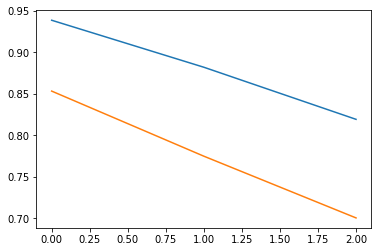

In [53]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(train_data, train_labels, validation_split=0.2, epochs=3, batch_size=10)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

## Using stored weights to predict in a test set

Model weights stored in an hdf5 file can be reused to populate an untrained model. Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. For example, you can use this model to make predictions from an unseen data set (e.g. test_data).

In [81]:
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add another convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu'))

# Add a pooling operation
model.add(MaxPool2D(2))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [82]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(test_data[:3])

array([[0.09926847, 0.09344571, 0.80728585],
       [0.03939046, 0.04304199, 0.91756755],
       [0.23671198, 0.7098689 , 0.05341915]], dtype=float32)

## Adding dropout to your network

Dropout is a form of regularization that removes a different random subset of the units in a layer in each round of training. In this exercise, we will add dropout to the convolutional neural network that we have used in previous exercises:

    Convolution (15 units, kernel size 2, 'relu' activation)
    Dropout (20%)
    Convolution (5 units, kernel size 2, 'relu' activation)
    Flatten
    Dense (3 units, 'softmax' activation)

A Sequential model along with Dense, Conv2D, Flatten, and Dropout objects are available in your workspace.

In [61]:
from keras.layers import Dense, Dropout

model = Sequential()

In [62]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

## Add batch normalization to your network

Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1. In this exercise, we will add batch normalization to the convolutional neural network that we have used in previous exercises:

    Convolution (15 units, kernel size 2, 'relu' activation)
    Batch normalization
    Convolution (5 unites, kernel size 2, 'relu' activation)
    Flatten
    Dense (3 units, 'softmax' activation)

A Sequential model along with Dense, Conv2D, Flatten, and Dropout objects are available in your workspace.

In [66]:
from keras.layers import BatchNormalization

model = Sequential()

In [67]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

## Extracting a kernel from a trained network

One way to interpret models is to examine the properties of the kernels in the convolutional layers. In this exercise, you will extract one of the kernels from a convolutional neural network with weights that you saved in a hdf5 file.

In [79]:
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add another convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu'))

# Add a pooling operation
model.add(MaxPool2D(2))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [80]:
# Load the weights into the model
model.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

[[ 0.03504268  0.4328133 ]
 [-0.17416623  0.4680562 ]]


## Visualizing kernel responses

One of the ways to interpret the weights of a neural network is to see how the kernels stored in these weights "see" the world. That is, what properties of an image are emphasized by this kernel. In this exercise, we will do that by convolving an image with the kernel and visualizing the result. Given images in the test_data variable, a function called extract_kernel() that extracts a kernel from the provided network, and the function called convolution() that we defined in the first chapter, extract the kernel, load the data from a file and visualize it with matplotlib.

A deep CNN model, a function convolution(), along with the kernel you extracted in an earlier exercise is available in your workspace.

Ready to take your deep learning to the next level? Check out Advanced Deep Learning with Keras in Python to see how the Keras functional API lets you build domain knowledge to solve new types of problems.

In [83]:
import matplotlib.pyplot as plt

# Convolve with the fourth image in test_data
out = convolution(test_data[3, :, :, 0], kernel)

# Visualize the result
plt.imshow(out)
plt.show()

NameError: name 'convolution' is not defined